In [234]:
import pandas as pd
import quandl
import numpy as np
import quandl
import matplotlib.pyplot as plt
import os
import math
import talib
#for item in talib.get_functions():
#    print (item)
plt.rc('figure', figsize=(20, 8), dpi=100)

/Users/abhishekmukherjee/Desktop


/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


           Date    Open     High       Low   Close    Volume  Ex-Dividend  \
0    1999-05-04   76.00   77.250   70.0000   70.38  22320900          0.0   
1    1999-05-05   69.88   69.880   66.2500   69.13   7565700          0.0   
2    1999-05-06   68.00   69.380   67.0600   67.94   2905700          0.0   
3    1999-05-07   67.94   74.880   66.7500   74.13   4862300          0.0   
4    1999-05-10   73.38   73.500   70.2500   70.69   2589400          0.0   
5    1999-05-11   70.00   71.190   69.5000   70.63   1839800          0.0   
6    1999-05-12   71.00   74.880   69.1300   73.50   2659300          0.0   
7    1999-05-13   73.25   75.250   72.5000   74.25   1142900          0.0   
8    1999-05-14   71.25   72.250   69.0600   70.19   2058400          0.0   
9    1999-05-17   69.13   70.250   68.0000   68.63   2075000          0.0   
10   1999-05-18   68.25   70.440   68.1300   68.63   1407100          0.0   
11   1999-05-19   69.38   69.810   68.7500   69.31    727400          0.0   

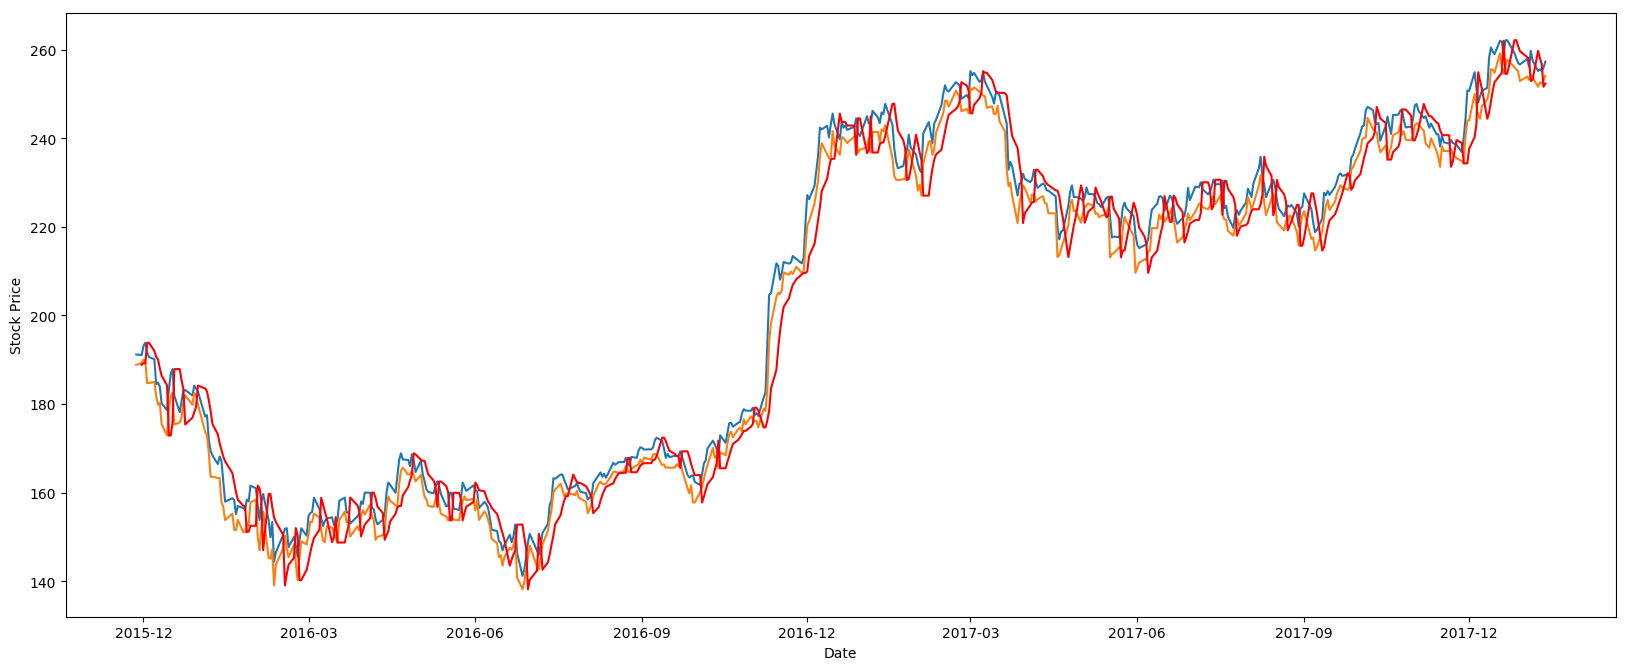

In [235]:
os.chdir("//Users//abhishekmukherjee//Desktop")
print (os.getcwd())

ticker = pd.read_excel("S&P500_Ticker.xlsx", index = False)
os.chdir("//Users//abhishekmukherjee//Desktop//data//PriceVolumeData")
stock = pd.read_excel("GS-US.xlsx", parse_dates = True)
stock_test = stock.loc[stock['Date'].between('2015-11-27','2018-01-15', inclusive=True)]
#ibm = ibm.loc[ibm['Date'].between('2014-11-27','2018-01-15', inclusive=True)]
#print (goog)
plt.ylabel("Stock Price")
plt.xlabel("Date")
#plt.plot(stock_test["Date"], stock_test['Close'])
plt.plot(stock_test["Date"], stock_test['High'])
plt.plot(stock_test["Date"], stock_test['Low'])
#ht = talib.HT_TRENDLINE(stock['Close'])
#rsi = talib.RSI(stock["Close"], timeperiod=10)
#plt.plot(stock["Date"], rsi)
#ema = talib.EMA(stock["Close"], timeperiod=10)
#sma = talib.ROC(stock["Close"], timeperiod=5)
#plt.plot(stock["Date"], ema)
#plt.plot(stock["Date"], sma)
#talib.MACD(stock["Close"])
mama, fama = talib.MAMA(stock_test["Close"], fastlimit=0.8, slowlimit=0.2)
sar = talib.SAR(stock_test['High'], stock_test['Low'], acceleration=0.7, maximum=0.2)
plt.plot(stock_test["Date"], sar, color = 'r')

print (stock)

In [236]:
#Simple Moving Average
def SMA(data, factor, days):
    
    data["SMA_"+ str(days) + "_" + factor] = talib.SMA(data[factor], timeperiod=days)
    return data

In [237]:
#Exponential Moving Average
def EMA(data, factor, days):
    
    data["EMA_"+ str(days) + "_" + factor] = talib.EMA(data[factor], timeperiod=days)
    return data

In [238]:
#Double Exponential Moving Average
def DEMA(data, factor, days):
    
    data["DEMA_"+ str(days) + "_" + factor] = talib.DEMA(data[factor], timeperiod=days)
    return data

In [239]:
#Hilbert_Transform
def HT(data, factor):
    
    data["HT_" + factor] = talib.HT_TRENDLINE(data[factor])
    return data

In [240]:
#Kaufman Adaptive Moving Average
def KAMA(data, factor, days):
    
    data["KAMA_"+ str(days) + "_" + factor] = talib.KAMA(data[factor], timeperiod=days)
    return data

In [241]:
#MESA Adaptive Moving Average
def MAMA(data, factor):
    
    mama, fama = talib.MAMA(data[factor], fastlimit=0.8, slowlimit=0.2)
    data["MAMA_" + factor] = mama
    data["FAMA_" + factor] = fama
    return data



In [242]:
#Triple Exponential Moving Average 
def TEMA(data, factor, days):
    
    data["TEMA_"+ str(days) + "_" + factor] = talib.TEMA(data[factor], timeperiod=days)
    return data

In [243]:
#Triangular Moving Average
def TRIMA(data, factor, days):
    
    data["TRIMA_"+ str(days) + "_" + factor] = talib.TRIMA(data[factor], timeperiod=days)
    return data

In [244]:
#Weighted Moving Average
def WMA(data, factor, days):
    
    data["WMA_"+ str(days) + "_" + factor] = talib.WMA(data[factor], timeperiod=days)
    return data


In [245]:
def technical_indicators(data):
    
    #Compute Daily Return
    data['Daily_Return'] = (data['Close'] - data['Open'])/data['Open']
    
    time_periods = [7, 14, 26, 52, 128, 252]
    factors = ['Close', 'Daily_Return', 'Volume']
    
    #Compute various types of Time and factor varying Moving Averages
    for days in time_periods:
        for factor in factors: 
            data = SMA(data, factor, days)
            data = EMA(data, factor, days)
            data = DEMA(data, factor, days)
            data = KAMA(data, factor, days)
            data = TEMA(data, factor, days)
            data = TRIMA(data, factor, days)
            data = WMA(data, factor, days)
    
    #Compute the Hilbert Transform and Mesa Adaptive Moving Average
    for factor in factors: 
        data = HT(data, factor)
        #data = MAMA(data, factor)
    
    close, open_, high, low, volume = data['Close'], data['Open'], data['High'], data['Low'], data['Volume']
    
    #Compute Parabolic SAR
    data['SAR'] = talib.SAR(high, low, acceleration=0.7, maximum=0.2)
    
    #Compute various Momentum based Indicators
    
    data['ADX_14'] = talib.ADX(high, low, close, timeperiod= 14)
    data['ADXR_14'] = talib.ADXR(high, low, close, timeperiod= 14)
    data['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
    data['aroondown_14'], data['aroonup_14'] = talib.AROON(high, low, timeperiod=14)
    data['AROONOSC_14'] = talib.AROONOSC(high, low, timeperiod=14)
    data['BOP_14'] = talib.BOP(open_, high, low, close)
    data['CCI_14'] = talib.CCI(high, low, close, timeperiod=14)
    data['CMO_14'] = talib.CMO(close, timeperiod=14)
    data['DX_14'] = talib.DX(high, low, close, timeperiod=14)
    data['macd'], data['macdsignal'], data['macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    data['MFI_14'] = talib.MFI(high, low, close, volume, timeperiod=14)    
    data['MINUS_DM_14'] = talib.MINUS_DM(high, low, timeperiod=14)
    data['MOM_10'] = talib.MOM(close, timeperiod=10)
    data['PLUS_DI_14'] = talib.PLUS_DI(high, low, close, timeperiod=14)
    data['PLUS_DM_14'] = talib.PLUS_DM(high, low, timeperiod=14)
    data['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
    data['ROC_10'] = talib.ROC(close, timeperiod=10)
    data['ROCP_10'] = talib.ROCP(close, timeperiod=10)
    data['ROCR'] = talib.ROCR(close, timeperiod=10)
    data['ROCR'] = talib.ROCR100(close, timeperiod=10)
    data['RSI_14'] = talib.RSI(close, timeperiod=14)
    data['RSI_26'] = talib.RSI(close, timeperiod=26)
    data['STOCH_slowk'], data['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    data['STOCH_fastk'], data['STOCH_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    data['STOCHRSI_fastk'], data['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    data['TRIX_30'] = talib.TRIX(close, timeperiod=30)
    data['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    data['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
    
    
    #Volality Indicator Functions
    data['ATR_14'] = talib.ATR(high, low, close, timeperiod=14)
    data['NATR_14'] = talib.NATR(high, low, close, timeperiod=14)
    data['TRANGE'] = talib.TRANGE(high, low, close)
    
    #Volume Indicator Functions
    data['AD'] = talib.AD(high, low, close, volume)
    data['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    data['OBV'] = talib.OBV(close, volume)
    
    #Moving Average Convergence Divergence
    data['ema26_close'] = data['Close'].ewm(span = 26).mean()
    data['ema12_close'] = data['Close'].ewm(span = 12).mean()
    data['MACD_Close'] = (data['ema12_close']-data['ema26_close'])

    #Bollinger Bands
    data['sd_Close_14'] = data['Close'].rolling(14).std()
    data['upper_band_14'] = data['SMA_14_Close'] + (data['sd_Close_14']*2)
    data['lower_band_14'] = data['SMA_14_Close'] - (data['sd_Close_14']*2)
    
    #Exponential Moving Average
    data['ema_close'] = data['Close'].ewm(com=0.4).mean()
    
    # Create Momentum
    data['momentum'] = data['Close']-1
    data['log_momentum'] = np.log(data['momentum'])
    return data

In [248]:
stock = technical_indicators(stock)

print (stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Columns: 192 entries, Date to log_momentum
dtypes: datetime64[ns](1), float64(188), int64(3)
memory usage: 7.0 MB
None


In [247]:
def plot_technical_indicators(dataset, last_days):
    
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    plt.plot(dataset['sma7'],label='SMA7', color='b',linestyle='-')
    plt.plot(dataset['Close'],label='Close Price', color='r')
    plt.plot(dataset['sma21'],label='SMA21', color='g',linestyle='-')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.15)
    plt.title('Technical indicators for IBM - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()
    plt.show()

    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='r', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='r', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

